# Exploratory Data Analysis in Action - EDA



**Import statements**



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Global settings**

In [3]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100
#pd.set_option('display.max_colwidth', -1)
plt.rcParams["figure.figsize"] = [15,6]

**Load data set**

In [4]:
import pickle
gdf_europe = pickle.load( open( "../datasets/gdf_europe.p", "rb" ) )
europe = pickle.load( open( "../datasets/europe.p", "rb" ) )

## Exploratory data analysis

<img src="./_img/phd053104s_data_by_numbers.gif", style="height: 350px;"> 

Source: [PHD Comics](http://phdcomics.com/comics/archive.php?comicid=462)

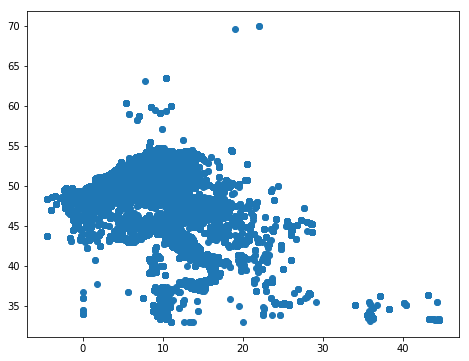

In [6]:
gdf_europe.plot()

In [ ]:
df = df_eng.copy()
df.shape

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.reset_index().groupby("Mission Date").count()["Mission ID"].plot()

In [ ]:
df.Country.unique()

In [ ]:
df.reset_index().groupby("Country").count()["Mission ID"].plot.bar()

In [ ]:
df.reset_index().groupby(["year",  "Country"]).count()["Mission ID"].unstack().plot.bar(rot=0)

In [ ]:
df.reset_index().groupby(["month",  "Country"]).count()["Mission ID"].unstack().plot.bar(rot=0)

In [ ]:
df.groupby(["year",  "Country"]).mean()['Altitude (meters)'].unstack().plot.bar()

In [ ]:
df.groupby(["Country"]).agg(["max", "median"])['Altitude (meters)'].plot.bar()

In [ ]:
df['High Explosives Weight (Tons)'].plot.hist(bins=100)

In [ ]:
df.groupby(["Country"]).agg(["mean", "median"])['High Explosives Weight (Tons)'].plot.bar()

In [ ]:
df.groupby(["year",  "Country"]).median()['High Explosives Weight (Tons)'].unstack().plot.bar()   

In [ ]:
_ = df.groupby("Target Country")["Target Country"].value_counts()
_[_ > 2000].plot.pie()

In [ ]:
df.reset_index().groupby(["year",  "Target Country"])["Mission ID"].count().sort_values(ascending=False)#.unstack().plot.bar()   

In [ ]:
len(df["Target Type"].unique())

In [ ]:
len(df["Target Industry"].unique())

In [ ]:
df.reset_index().groupby("Target Industry").count()["Mission ID"].sort_values(ascending=False).plot.bar(figsize=(16,4))

In [ ]:
df['Target Country'].unique()

In [ ]:
df.reset_index().groupby("Target Country").count()["Mission ID"].sort_values(ascending=False).plot.bar(figsize=(16,4))

In [ ]:
df.groupby("Target Country").sum()["High Explosives Weight (Tons)"].sort_values(ascending=False).plot.bar(figsize=(16,4))

#### Kernel density plot

In [ ]:
import seaborn as sns

In [ ]:
#fig, ax = plt.subplots(224)
fig = plt.figure(figsize=(16,12))
# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
bws = [0.2, 0.4, 0.6, 0.8]
for e in range(4):
    ax = plt.subplot(2,2,e+1)
    ax.set_aspect('equal')
    europe.plot(ax=ax, facecolor='lightgray')
    sns.kdeplot(gdf_europe['Target Longitude'], gdf_europe['Target Latitude'],
                cmap="viridis", shade=True, shade_lowest=False, ax=ax, bw=bws[e])
    ax.set_title("Bandwith: " + str(bws[e]), size=16)
plt.tight_layout()
plt.suptitle("KDE for different bandwith parameters", size=22);

In [ ]:
gdf_europe.Country.unique()

In [ ]:
gdf_europe.Country.replace(np.nan, "unknown", inplace=True)

In [ ]:
fig = plt.figure(figsize=(16,12))
years = [1940, 1941 ,1942, 1943, 1944, 1945]
for e in range(len(years)):
    ax = plt.subplot(3,2,e+1)
    ax.set_aspect('equal')
    europe.plot(ax=ax, facecolor='lightgray')
    _ = gdf_europe.loc[gdf_europe.year == years[e]]
    _.plot(ax=ax, marker='o', cmap='Set1',           
           column='Country', legend=True, 
           markersize=5, alpha=1)
    ax.set_title("Year: " + str(years[e]), size=16)    
plt.tight_layout()
plt.suptitle("Attacks for different years", size=22)
plt.subplots_adjust(top=0.92)